# <center> [Adult salaries](https://archive.ics.uci.edu/ml/datasets/adult): Decission Tree
### <center>Predict whether income exceeds $50K/yr based on census data.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier, plot_tree
from sklearn.metrics         import accuracy_score, balanced_accuracy_score, plot_confusion_matrix

# Leer CSV

In [0]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
!wget -P ./../data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv

--2020-02-04 15:04:15--  https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3818789 (3.6M) [text/plain]
Saving to: ‘./../data/adult.csv’

adult.csv           100%[===================>]   3.64M  16.8MB/s    in 0.2s    

2020-02-04 15:04:15 (16.8 MB/s) - ‘./../data/adult.csv’ saved [3818789/3818789]



In [0]:
df = pd.read_csv("../data/adult.csv")
df.shape

(32561, 15)

In [0]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


# Qué queremos predecir? -> `df.Salary`

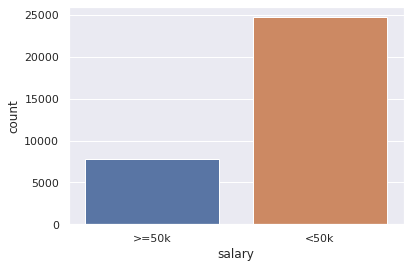

In [0]:
sns.countplot(df.salary);

# Vemos que la mayor parte de la gente cobra <50k, por lo que deberemos buscar algo mas que buscar "aciertos".
# Es mejor ver la precisión balanceada: es una metrica para ver como funciona nuestro modelo cuando no está balanceado.

# <center> Pre-processing (Preprocesado)
- Replace categories with their numeric codes: reemplazar categóricas con sus códigos numéricos. Buscamos un dataset en el que todo sean números.
- handle missing continuous values: manejar los valores continuos que no existen.
- Select target variable: seleccionar la variable a predecir.
- Split train and validation sets: dividir nuestros casos en dos conjuntos: uno para entrenar y otro para validar. Es muy importante definir el conjunto de validación porque es el que nos dirá lo bien que va nuestro modelo.

# Missings (valores perdidos)

In [0]:
df = df.dropna(axis='rows')
df.shape
# quitamos las filas con missing, es decir, con aquellas filas que están completas.
# Hay varios criterios para tratar con missings:
#   1 - quitar la fila
#   2 - quitar la columna
#   3 - rellenar de forma restimada.
# La tecnica mas compleja es hacer un clasificador de columna, es decir, predecirla con ML.

(31812, 15)

# Categories

In [0]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)
print("\nDate/time features:\n", time.values)

# Varias técnicas:
#   la mas conocida: labelEncoder (un numero por cada categoría, es automático).


Numerical features:
 ['age' 'fnlwgt' 'education-num' 'capital-gain' 'capital-loss'
 'hours-per-week']

Categorical features:
 ['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'sex' 'native-country' 'salary']

Date/time features:
 []


In [0]:
df[cat] = df[cat].apply(LabelEncoder().fit_transform);
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1,44,4,236746,12,14.0,0,4,1,4,1,10520,0,45,39,1
3,38,5,112847,14,15.0,2,10,0,1,1,0,0,40,39,1
5,20,4,63210,11,9.0,4,6,3,4,1,0,0,15,39,0
8,46,4,328216,11,9.0,2,3,0,4,1,0,0,40,39,1
21,26,4,746432,11,9.0,4,6,3,2,1,0,0,48,39,0


# Train (80%) and validation (20%)

In [0]:
# En x me quedo con todas las variables menos la que quiero predecir, 'salary'.
# En y me quedo con la categórica 'salary' en sí.
x = df.drop("salary", axis="columns")
y = df["salary"]

1        1
3        1
5        0
8        1
21       0
        ..
32556    1
32557    0
32558    1
32559    0
32560    0
Name: salary, Length: 31812, dtype: int64

In [0]:
# train_test_split: Split arrays or matrices into random train and test subsets
# concepto de estratificación para que el conjunto de test tenga un poco de cada clase
# x_train, y_train: datos de entrada y validamiento.

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)

# Train Decission Tree

In [0]:
# Entrenamos el arbol de decisión
# Para cada modelo se definen unos hiperparametros.

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
plot_tree(model)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f30c80599d8> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
plot_tree(model);

# Use Decission Tree to prect new data

In [0]:
# Predecimos con el conjunto de validación
preds = model.predict(x_valid)
preds

array([1, 0, 0, ..., 0, 0, 1])

# Metrics

Accuracy (Caution): 81.36099324218135
Balanced accuracy:  75.13754746537799


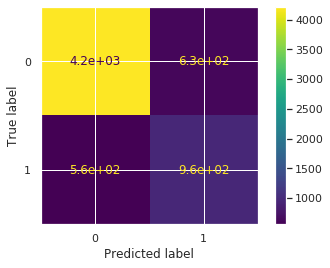

In [0]:
# Precisión: acertamos el 81% de las veces.
print("Accuracy (Caution):", accuracy_score(y_valid, preds)*100)

# Precisión balanceada: acertamos el 75% de las veces.
print("Balanced accuracy: ", balanced_accuracy_score(y_valid, preds)*100)

# Matriz de confusión
plot_confusion_matrix(model, x_valid, y_valid);

# Feature importance

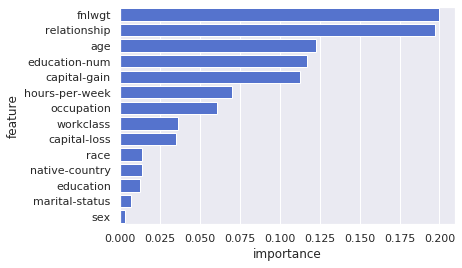

In [0]:
# Que variables estoy teniendo mas en cuenta para la predicción.
fi = pd.DataFrame({
      'feature':     x.columns,
      'importance':  model.feature_importances_
     }).sort_values('importance', ascending=False).reset_index(drop=True)

sns.barplot(x=fi.importance, y=fi.feature, color='royalblue');

# Podríamos quitar aquellas variables que aportan poco a la predicción para mejorar el modelo.
# Otra optimización sería el conocimiento experto de las variables: la gente que cobra mas suele vivir en los mejores barrios, tener mas educación, etc.